In [22]:
#crea un octree de 32x32x32 del archivo de entrada indicado
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [35]:
cloud_file = np.loadtxt('/home/miguelmg/Documents/CIDETEC/semestre 2/vision 3d/proyecto/6d pose/hinterstoisser/nubes/dataset/test_DNN/octree_pruned2.txt')
octree_file = '/home/miguelmg/Dropbox/tesis/octree_DNN5'
##octree configuration parameters 
min_octrees_file = -0.0542485  #object capsule param from partialModelCofig file
max_octrees_file = -min_octrees_file
min_cubo = 0
max_cubo = 32

m = (max_cubo - min_cubo) / (max_octrees_file - min_octrees_file)
output_cube_size = 32*32*32

In [36]:
x = cloud_file[:,0]
y = cloud_file[:,1]
z = cloud_file[:,2]
v = cloud_file[:,3]
output_cube = np.zeros((32,32,32))
##### the cube of the octree of size 32x32x32 is obtained
for i in range(output_cube_size):
    x_cube = int((x[i]*m*2+32)/2)
    y_cube = int((y[i]*m*2+32)/2)
    z_cube = int((z[i]*m*2+32)/2)
    output_cube[x_cube][y_cube][z_cube] = v[i]
##### flatten representation of the cube is obtained
flatten_cube = output_cube.reshape(1,32*32*32)
np.save(octree_file,flatten_cube)

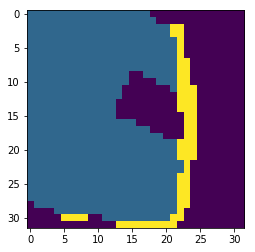

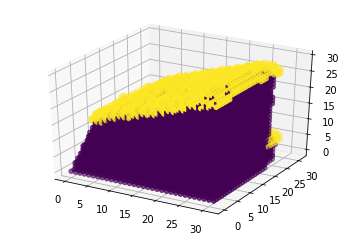

In [21]:
b = np.reshape(flatten_cube, (32,32,32))
x_new = []
y_new = []
z_new = []
val = []
plt.imshow(b[:][:][15])
plt.show()
#mpld3.display()

for i in range(32):
    for j in range(32):
        for k in range(32):
            if b[i][j][k] >= 0.5 and b[i][j][k] < 0.6:
                x_new.append(i)
                y_new.append(j)
                z_new.append(k)
                val.append(0)
            elif b[i][j][k] >= 0.6:
                x_new.append(i)
                y_new.append(j)
                z_new.append(k)
                val.append(255)
                
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_new,y_new,z_new, c = val)
plt.show()   